## Case study for Media company
Some Reasons
* Decline in number of people coming to the platform
* fewer people watching video
* decrease in marketing spend
* competitive shows
* special holidays
* Twist in the story

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [82]:
media = pd.read_csv('data/mediacompany.csv')
media = media.drop('Unnamed: 7',axis=1)

In [83]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [84]:
media['Date'] = pd.to_datetime(media['Date'])


In [85]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


### our multiple linear regression looks like
$y = \sum_{i} m_ix_i  + c $

In [86]:
# deriving day since the show started
d0 = pd.Timestamp(2017,2,28)
d1 = media['Date']
delta = d1 - d0
media['day'] = delta

In [87]:
def cutDate(x):
    return int(str(x)[0:2])

In [88]:
# converting date to int
media['day'] = media['day'].apply(cutDate)

<ipython-input-89-8abf3b97795a>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


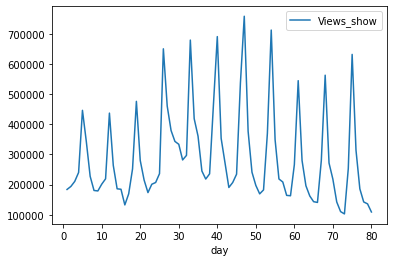

In [89]:
# days vs view show
media.plot.line(x='day',y='Views_show')
plt.show()

<ipython-input-90-8d6d05c946d0>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


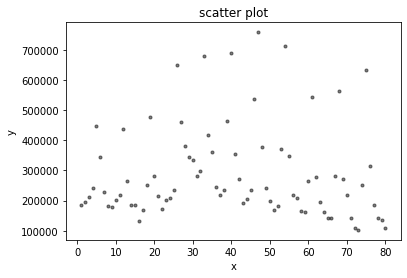

In [90]:
# scatter plot
colors = '#000000'
area = np.pi*3
plt.scatter(x=media['day'],y=media['Views_show'],s=area,c=colors,alpha=.5)
plt.title('scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

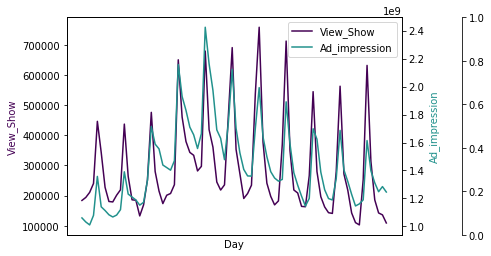

In [91]:
# view shows and add impression with respect to the day

# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
# no x-ticks
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

In [92]:
# Generate weekday variable
# weekdays are taken such that 1 corresponds to Sunday 7 to Saturday
# we know the number it started it started in wednesday
media['weekday'] = (media['day']+3) % 7
media['weekday'].replace(0,7,inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [93]:
X = media[['Visitors','weekday']]
y = media['Views_show']

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()

In [96]:
lm.fit(X,y)


LinearRegression()

In [97]:
# or do it with OLS to check the summary

import statsmodels.api as sts

X = sts.add_constant(X)

lm_1 = sts.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           8.01e-12
Time:                        00:25:23   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [98]:
def weekend(i):
    if i % 7 == 5 or i % 7 == 4:
        return 1
    return 0

media['weekend'] = media['day'].apply(weekend)

In [99]:
import statsmodels.api as sts
X = media[['Visitors','weekend']]
y = media['Views_show']

X = sts.add_constant(X)

lm_2 = sts.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           2.51e-12
Time:                        00:25:23   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [100]:
import statsmodels.api as sts
X = media[['Visitors','weekend','Character_A']]
y = media['Views_show']

X = sts.add_constant(X)

lm_3 = sts.OLS(y,X).fit()
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.53e-14
Time:                        00:25:23   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [101]:
# create lag variable
# basically shifting
media['Lag_Views'] = np.roll(media['Views_show'],1)
# we did check it out last day visitor is the 108961 number
media['Lag_Views'].replace(108961,0,inplace=True)

In [102]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [103]:
import statsmodels.api as sts
X = media[['Visitors','Character_A','Lag_Views','weekend']]
y = media['Views_show']

X = sts.add_constant(X)

lm_4 = sts.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           3.16e-21
Time:                        00:25:23   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<AxesSubplot:>

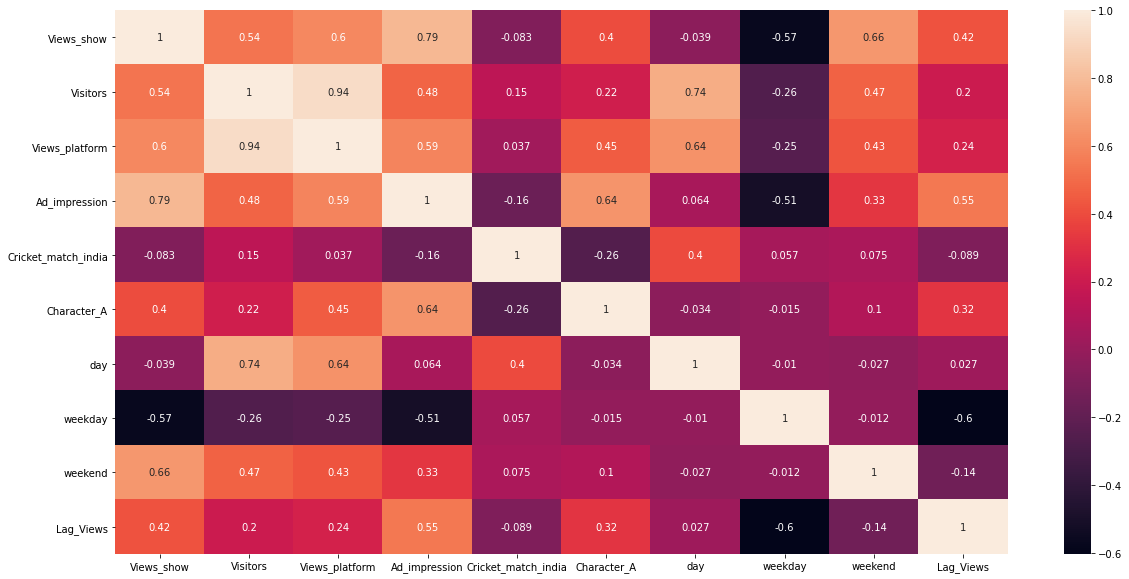

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(media.corr(),annot=True)

In [110]:
# but lag views does not make any sense we can remove it
import statsmodels.api as sts
X = media[['Views_platform','Character_A','weekend']]
y = media['Views_show']

X = sts.add_constant(X)

lm_5 = sts.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           3.59e-15
Time:                        00:33:02   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [111]:
# making something that you can give to the marketing team
import statsmodels.api as sts
X = media[['Visitors','Character_A','weekend']]
y = media['Views_show']

X = sts.add_constant(X)

lm_6 = sts.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.53e-14
Time:                        00:35:52   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [112]:
# making something that you can give to the marketing team
import statsmodels.api as sts
X = media[['Visitors','Character_A','weekend','Ad_impression']]
y = media['Views_show']

X = sts.add_constant(X)

lm_7 = sts.OLS(y,X).fit()
print(lm_7.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.10e-25
Time:                        00:36:49   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [113]:
# judging upper p value

import statsmodels.api as sts
X = media[['Character_A','weekend','Ad_impression']]
y = media['Views_show']

X = sts.add_constant(X)

lm_8 = sts.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.05e-26
Time:                        00:37:42   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [114]:
media['ad_impression_million'] = media['Ad_impression']/1000000

In [117]:
# with new ad impression

import statsmodels.api as sts
X = media[['Character_A','weekend','ad_impression_million','Cricket_match_india']]
y = media['Views_show']

X = sts.add_constant(X)

lm_9 = sts.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.02e-25
Time:                        00:43:59   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [118]:
# with new ad impression

import statsmodels.api as sts
X = media[['Character_A','weekend','ad_impression_million']]
y = media['Views_show']

X = sts.add_constant(X)

lm_10 = sts.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.05e-26
Time:                        00:44:07   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

In [121]:
# Character_A huge p value

import statsmodels.api as sts
X = media[['weekend','ad_impression_million']]
y = media['Views_show']

X = sts.add_constant(X)

lm_11 = sts.OLS(y,X).fit()
print(lm_11.summary())

lm11_predicted = lm_11.predict(X)

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           1.95e-27
Time:                        00:49:41   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

## now trying to appreciate the new model

In [122]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(media.Views_show,lm11_predicted)
r_squared = r2_score(media.Views_show,lm11_predicted)

print('Mean Square Value',mse)
print('R Square',r_squared)


Mean Square Value 4797239258.824437
R Square 0.7975978797926214


Text(0, 0.5, 'Views')

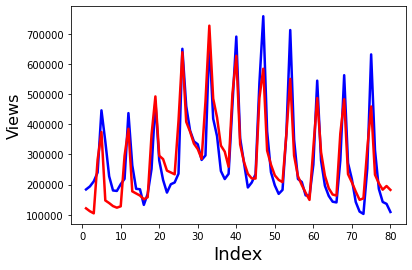

In [123]:
c = [ i for i in range(1,81,1)]
plt.plot(c,media['Views_show'],color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,lm11_predicted,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=16)

Text(0, 0.5, 'Views')

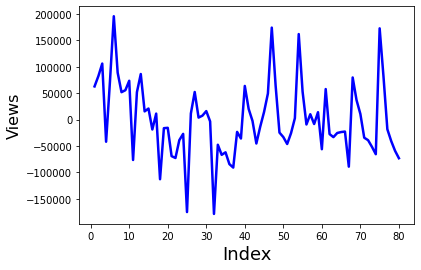

In [124]:
c = [ i for i in range(1,81,1)]
plt.plot(c,media['Views_show'] - lm11_predicted,color='blue',linewidth=2.5,linestyle='-')
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=16)